In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import env

####### A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.


In [3]:
## What is the probability that no cars drive up in the noon hour?

In [4]:
λ=2
stats.poisson(λ).pmf(0)

0.1353352832366127

In [5]:
#What is the probability that 3 or more cars come 
#through the drive through?

In [6]:
stats.poisson(λ).sf(2) #not inclusive, so use 2 not 3

0.32332358381693654

In [7]:
#How likely is it that the drive through gets at least 1 car?

In [8]:
stats.poisson(λ).sf(0)

0.8646647167633873

<BarContainer object of 10 artists>

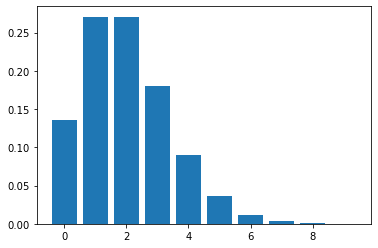

In [9]:
x = np.arange(0,10)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)

In [8]:
#class

In [9]:
λ=2
bankcars = stats.poisson(λ)

<BarContainer object of 10 artists>

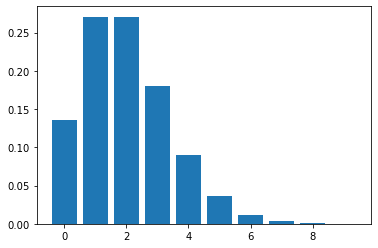

In [10]:
x = np.arange(0,10)
y = bankcars.pmf(x)

plt.bar(x,y)

####### Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [11]:
gpa = stats.norm(3, .3)

In [12]:
#What grade point average is required to be in the top 5% of the graduating class?
gpa.isf(.06) #upper limit is not inclusive

3.466432078379056

In [13]:
#or
gpa.ppf(.95)

3.4934560880854417

In [14]:
#What GPA constitutes the bottom 15% of the class?
gpa.ppf(.15) #bottom limit is inclusive

2.689069983151863

In [15]:
#An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
#Determine the range of the third decile. 
#Would a student with a 2.8 grade point average qualify for this scholarship?
gpa.ppf(.2)


2.7475136299281258

In [16]:
gpa.ppf(.3)

2.842679846187588

In [17]:
# Range is 2.84 - 2.92 
# Yes, a 2.8 will qualify

In [18]:
#If I have a GPA of 3.5, what percentile am I in?
gpa.cdf(3.5)

0.9522096477271853

####### #3 A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?


In [19]:
obs = 4326
p = .02

clicks = stats.binom(obs, p)

In [20]:
clicks.sf(96) #exclusive function

0.13975823631416448

####### #4 You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

    What is the probability that at least one of your first 60 
    answers is correct?


In [21]:
#Total possible outcomes for 5 coin flips = 2.2.2.2.2 = 32

In [22]:
#Total possibile outcomes for 4 digits = 10.10.10.10 = 10_000

In [23]:
n_questions = 60
p = 1/100

correct = stats.binom(n_questions, p)

In [24]:
correct.sf(0)

0.45284335760923855

####### #5 Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [25]:
cleaning = .03

In [26]:
total_stud = int(.9*3*22)
total_stud

59

In [27]:
clean = stats.binom(total_stud, cleaning)

In [28]:
clean.sf(0)

0.8342199288437352

In [29]:
clean = stats.binom((2*total_stud), cleaning)

In [30]:
clean.pmf(0)

0.027483031992576134

In [31]:
clean = stats.binom((5*total_stud), cleaning) #assuming 5 work days

In [32]:
clean.pmf(0)

0.00012521651388091245

####### #6 You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [33]:
lunch = stats.norm(15, 3) #people
#assumption: two person team. One person taking orders, the other makeing them

In [34]:
lt = stats.norm(150, 30) #time in minutes 

In [35]:
lt.cdf(43) #+2 min for initial order when nothing is being made
#2+43 = 45
#assumption: two person team. One person taking orders, the other makeing them

0.00018077544840556015

In [36]:
#you gonna be late. or hungry

In [37]:
#one person team
# 15 people x 12 min each = 180 += 36 min
lunch = stats.norm(180, 36)

In [38]:
lt.cdf(45)

0.00023262907903552502

In [39]:
#class

In [40]:
stats.norm(15, 3).cdf(16) #he did it by people and with different assumptions

0.6305586598182363

######## #7 Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [41]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [42]:
query = '''
SELECT
    s.salary,
    e.emp_no
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()
'''

sal = pd.read_sql(query, url)
sal.head()

,salary,emp_no
0,88958,10001
1,72527,10002
2,43311,10003
3,74057,10004
4,94692,10005


In [43]:
sal.shape

(240124, 2)

In [44]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   salary  240124 non-null  int64
 1   emp_no  240124 non-null  int64
dtypes: int64(2)
memory usage: 3.7 MB


In [45]:
sal.describe()

,salary,emp_no
count,240124.000000,240124.000000
mean,72012.235857,253080.615365
std,17309.995380,161853.087323
min,38623.000000,10001.000000
25%,59048.750000,84878.750000
50%,69805.000000,249792.500000
75%,82546.000000,424895.250000
max,158220.000000,499999.000000


In [46]:
sal_prob = stats.norm(72012, 17309) #normal distribution

In [47]:
#What percent of employees earn less than 60,000?

In [48]:
sal_prob.cdf(60_000)

0.2438491840795911

In [49]:
sal['sixty'] = sal.salary < 60_000

In [50]:
sal.sixty.mean()

0.2705727041028802

In [51]:
#What percent of employees earn more than 95,000?

In [52]:
sal_prob.sf(95_000)

0.09207332774098781

In [53]:
sal['ninety_five'] = sal.salary > 95_000

In [54]:
sal.ninety_five.mean()

0.1086272092752078

In [55]:
#What percent of employees earn between 65,000 and 80,000?

In [56]:
#class
# np.diff(sal.cdf([65000, 80000]))

In [57]:
sal_prob.cdf(80_000)-sal_prob.cdf(65_000)

0.33507852649679154

In [58]:
sal['sf_e'] = (sal.salary > 65_000) & (sal.salary < 80_000)

In [59]:
sal.sf_e.mean()

0.325107028035515

In [60]:
#What do the top 5% of employees make?

In [61]:
sal_prob.isf(.05)

100482.77142890304

In [62]:
l = sal.sort_values('salary', ascending = False).head(int(len(sal)*.05))
l

,salary,emp_no,sixty,ninety_five,sf_e
26990,158220,43624,False,True,False
123787,156286,254466,False,True,False
30486,155709,47978,False,True,False
123369,155513,253939,False,True,False
79658,155190,109334,False,True,False
...,...,...,...,...,...
140336,104232,275165,False,True,False
167510,104230,409170,False,True,False
33075,104229,51196,False,True,False
50047,104229,72377,False,True,False


In [63]:
l.salary.mean()

113408.81750791271